In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# ls drive/MyDrive/'Final_Project_ICH'/'CSV_file'/

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

# Очистка данных в таблице **Deals**
- преобразование формата данных Id, Contact Name строчный форомат(object)
- преобразование дат в формат datetime Closing Date, Created Time
- проверка дубликатов и их удаление
- удаление пустых(не релевантных) столбцов, строк
- просмотр уникальных значений
- проверка значений NaN
- замена типа данных на категориальные
- заполнение/замена значений категориальных NaN = Unknown
- контроль данных и значений

In [4]:
deals_df = pd.read_csv('drive/MyDrive/Final_Project_ICH/CSV_file/Deals.csv', dtype={"Id": str, 'Contact Name': str})
deals_df.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,women,Facebook Ads,NaN,NaN,NaN,21.06.2024 15:30,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,NaN,Organic,NaN,Web Developer,Morning,21.06.2024 15:23,6.0,NaN,0,"$2,000.00",5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,0:26:43,b1-at,21_06_2024,Telegram posts,NaN,NaN,NaN,21.06.2024 14:45,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,1:00:04,bloggersvideo14com,recentlymoved,Facebook Ads,NaN,NaN,NaN,21.06.2024 13:32,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,0:53:12,website,NaN,Google Ads,NaN,NaN,NaN,21.06.2024 13:21,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN


In [5]:
# Сразу преобразую формата дат
deals_df["Closing Date"] = pd.to_datetime(deals_df["Closing Date"], format="%d.%m.%Y", errors='coerce')
deals_df["Created Time"] = pd.to_datetime(deals_df["Created Time"], format="%d.%m.%Y %H:%M", errors='coerce') #оставила с временем, но возможно позже преобразую и оставлю только дату

In [6]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21593 non-null  object        
 1   Deal Owner Name      21564 non-null  object        
 2   Closing Date         14645 non-null  datetime64[ns]
 3   Quality              19340 non-null  object        
 4   Stage                21593 non-null  object        
 5   Lost Reason          16124 non-null  object        
 6   Page                 21593 non-null  object        
 7   Campaign             16067 non-null  object        
 8   SLA                  15533 non-null  object        
 9   Content              14147 non-null  object        
 10  Term                 12454 non-null  object        
 11  Source               21593 non-null  object        
 12  Payment Type         496 non-null    object        
 13  Product              3592 non-n

In [7]:
deals_df.isnull().sum()

,0
Id,2
Deal Owner Name,31
Closing Date,6950
Quality,2255
Stage,2
Lost Reason,5471
Page,2
Campaign,5528
SLA,6062
Content,7448


In [8]:
# deals_df.duplicated(subset=['Contact Name']).sum()

In [9]:
deals_df.duplicated().sum()

np.int64(0)

In [10]:
# поиск для таблицы Calls заполнение пропущенного
#deals_df[deals_df['Contact Name']=='5805028000008772190']

# Contact Name


In [11]:
deals_df['Contact Name'].unique()

array(['5805028000056849495', '5805028000056834471',
       '5805028000056854421', ..., '5805028000000983028',
       '5805028000000968001', '5805028000001009140'], dtype=object)

In [12]:
deals_df['Contact Name'].nunique()

18089

In [13]:
deals_df['Contact Name'].isnull().sum()

np.int64(63)

In [14]:
# Удалим строки с пропусками в идентификаторах (контактное лицо не может быть с пропуском)
deals_df = deals_df.dropna(subset='Contact Name')

In [15]:
# дубликаты только по контактным лицам
deals_df['Contact Name'].duplicated()
duplicates = deals_df[deals_df['Contact Name'].duplicated(keep=False)]
duplicates

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
9,5805028000056864442,Victor Barnes,2024-06-21,D - Non Target,Lost,Inadequate,/email,1406start,0:10:08,NaN,NaN,CRM,NaN,NaN,NaN,2024-06-21 12:39:00,NaN,NaN,NaN,NaN,5805028000039274091,NaN,NaN
14,5805028000056828180,Paula Underwood,NaT,D - Non Target,Call Delayed,NaN,/direct,NaN,0:59:25,NaN,NaN,SMM,NaN,NaN,NaN,2024-06-21 11:55:00,NaN,NaN,NaN,NaN,5805028000056685457,NaN,NaN
19,5805028000056854090,Amy Green,2024-06-21,E - Non Qualified,Lost,Invalid number,/email,1006start,NaN,NaN,NaN,CRM,NaN,NaN,NaN,2024-06-21 10:49:00,NaN,NaN,NaN,NaN,5805028000013202024,NaN,NaN
20,5805028000056892092,Ulysses Adams,NaT,NaN,Need a consultation,NaN,/,NaN,1:03:57,NaN,NaN,Organic,NaN,NaN,NaN,2024-06-21 10:38:00,NaN,NaN,NaN,NaN,5805028000053247795,NaN,NaN
33,5805028000056694634,Eva Kent,NaT,NaN,Registered on Webinar,NaN,/webinar,NaN,NaN,NaN,NaN,Organic,NaN,NaN,NaN,2024-06-20 22:15:00,NaN,NaN,NaN,NaN,5805028000054756081,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,5805028000000935081,Julia Nelson,NaT,D - Non Target,Call Delayed,NaN,eng/digital-marketing,03.07.23women,1703:12:53,b3,women,Facebook Ads,NaN,Digital Marketing,Morning,2023-07-04 11:46:00,11.0,NaN,1000,"$11,500.00",5805028000000971007,NaN,NaN
21586,5805028000000947046,Oliver Taylor,NaT,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_DE,1704:46:22,b3,wide,Facebook Ads,NaN,Digital Marketing,Morning,2023-07-04 10:11:00,11.0,11.0,1000,"$11,000.00",5805028000000939010,NaN,NaN
21588,5805028000000970006,Jane Smith,2023-07-04,E - Non Qualified,Lost,Duplicate,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21589,5805028000000948010,Jane Smith,2023-08-29,B - Medium,Lost,needs time to think,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN


# Id

In [16]:
# смотрим сколько сделок
deals_df['Id'].nunique()

21531

In [17]:
# смотрим пропущенные
deals_df['Id'].isnull().sum()

np.int64(0)

# Deal Owner Name

In [18]:
deals_df['Deal Owner Name'].unique()

array(['Ben Hall', 'Ulysses Adams', 'Eva Kent', 'Paula Underwood',
       'Rachel White', 'Victor Barnes', 'Amy Green', 'Ian Miller',
       'Quincy Vincent', 'Charlie Davis', 'Nina Scott', 'Julia Nelson',
       'Cara Iverson', 'Kevin Parker', 'Yara Edwards', 'John Doe',
       'Oliver Taylor', 'Zachary Foster', 'Xander Dean', 'Wendy Clark',
       'Sam Young', 'Diana Evans', 'Jane Smith', 'Mason Roberts',
       'Bob Brown', 'George King', nan, 'Alice Johnson'], dtype=object)

In [19]:
deals_df[deals_df['Deal Owner Name'].isnull()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
18834,5805028000009465153,NaN,NaT,C - Low,Qualificated,NaN,eng/digital-marketing,12.07.2023wide_DE,0:28:20,bloggersvideo3com,wide,Tiktok Ads,NaN,NaN,NaN,2023-09-29 18:09:00,NaN,NaN,NaN,NaN,5805028000009482152,NaN,NaN
18954,5805028000009133444,NaN,NaT,C - Low,Qualificated,NaN,/eng,24.09.23retargeting_DE,2:15:53,bloggersvideo5,retargeting,Facebook Ads,NaN,NaN,NaN,2023-09-27 13:23:00,NaN,NaN,NaN,NaN,5805028000009150146,NaN,NaN
19054,5805028000008812739,NaN,NaT,C - Low,Qualificated,NaN,eng/digital-marketing,04.07.23recentlymoved_DE,0:03:30,bloggersvideo4com,recentlymoved,Facebook Ads,NaN,NaN,NaN,2023-09-25 15:11:00,NaN,NaN,NaN,NaN,5805028000008758890,NaN,NaN
19150,5805028000008666416,NaN,2023-10-12,C - Low,Lost,Changed Decision,/direct,NaN,0:11:32,NaN,NaN,SMM,NaN,NaN,NaN,2023-09-23 16:34:00,NaN,NaN,NaN,NaN,5805028000008647384,NaN,NaN
19248,5805028000008355196,NaN,NaT,B - Medium,Qualificated,NaN,/eng,mu_DE,0:09:00,NaN,20_09_2023,Bloggers,NaN,NaN,NaN,2023-09-21 11:32:00,NaN,NaN,NaN,NaN,5805028000008364208,NaN,NaN
19254,5805028000008367218,NaN,NaT,C - Low,Qualificated,NaN,/eng/test,mu_DE,11:47:45,NaN,20_09_2023,Bloggers,NaN,NaN,NaN,2023-09-21 08:50:00,NaN,NaN,NaN,NaN,5805028000008367188,NaN,NaN
19337,5805028000008036373,NaN,NaT,B - Medium,Qualificated,NaN,eng/digital-marketing,15.07.23b_DE,2:28:27,b6,b,Facebook Ads,NaN,NaN,NaN,2023-09-19 14:43:00,NaN,NaN,NaN,NaN,5805028000008017270,NaN,NaN
19382,5805028000007956266,NaN,NaT,C - Low,Qualificated,NaN,eng/digital-marketing,05.09.2023wide_DE,15:18:30,v11,wide,Tiktok Ads,NaN,NaN,NaN,2023-09-18 04:02:00,NaN,NaN,NaN,NaN,5805028000007865975,NaN,NaN
19438,5805028000007863693,NaN,2023-10-13,C - Low,Lost,Not for myself,/eng/ux-ui,Dis_DE,0:09:01,151836595805_{region_name}_673801337002,NaN,Google Ads,NaN,NaN,NaN,2023-09-16 10:45:00,NaN,NaN,NaN,NaN,5805028000007854438,NaN,NaN
19439,5805028000007863646,NaN,2023-10-13,C - Low,Lost,Changed Decision,/eng/ux-ui,12.09.23interests_Uxui_DE,1:12:47,bloggersvideo2comwebdev,interest_programming_WebDev,Facebook Ads,NaN,NaN,NaN,2023-09-16 10:20:00,NaN,NaN,NaN,NaN,5805028000007858469,NaN,NaN


In [20]:
deals_df = deals_df.dropna(subset=['Deal Owner Name'])

In [21]:
deals_df['Deal Owner Name'].nunique()

27

In [22]:
# много строк без ответственного лица за сделки
# deals_df[deals_df['Deal Owner Name'].isnull()].isnull().sum()

# Closing Date

In [23]:
deals_df['Closing Date'].isnull().sum()

np.int64(6905)

In [24]:
deals_df['Closing Date'].min()

Timestamp('2022-10-11 00:00:00')

In [25]:
deals_df[deals_df['Closing Date']== '2022-10-11 00:00:00']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
18658,5805028000009789201,Julia Nelson,2022-10-11,E - Non Qualified,Lost,Doesn't Answer,eng/digital-marketing,02.07.23wide_DE,0:44:33,b8,wide,Facebook Ads,NaN,NaN,NaN,2023-10-03 10:36:00,NaN,NaN,NaN,NaN,5805028000009784179,NaN,NaN


In [26]:
deals_df.loc[deals_df['Closing Date'] == '2022-10-11 00:00:00', 'Closing Date'] = pd.NaT

In [27]:
deals_df['Closing Date'].min()

Timestamp('2023-07-03 00:00:00')

In [28]:
deals_df['Closing Date'].max()

Timestamp('2024-12-11 00:00:00')

In [29]:
deals_df[deals_df['Closing Date']== '2024-12-11 00:00:00']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
12806,5805028000025477353,Nina Scott,2024-12-11,D - Non Target,Lost,Non target,/eng/test,BloggerShina_DE,0:18:19,NaN,11_01_2024,Bloggers,NaN,NaN,NaN,2024-01-11 16:03:00,NaN,NaN,NaN,NaN,5805028000016832230,NaN,NaN


In [30]:
# удаляю, больше похоже на тест
deals_df = deals_df[deals_df['Closing Date'] != '2024-12-11 00:00:00']

In [31]:
deals_df['Closing Date'].max()

Timestamp('2024-09-25 00:00:00')

# Quality

In [32]:
deals_df['Quality'].unique()

array([nan, 'D - Non Target', 'E - Non Qualified', 'B - Medium',
       'C - Low', 'A - High', 'F'], dtype=object)

In [33]:
deals_df['Quality'].value_counts(dropna=False)

,count
Quality,
E - Non Qualified,7619
D - Non Target,6239
C - Low,3423
NaN,2252
B - Medium,1542
A - High,425
F,3


In [34]:
# заменяем буквенное значение F на Special
deals_df['Quality'] = deals_df['Quality'].replace('F', 'F-Special')

In [35]:
# уберем буквенные значения, оставим только названия
deals_df['Quality'] = deals_df['Quality'].str.replace(r'^[A-Za-z]\s*-\s*', '', regex=True)

In [36]:
deals_df['Quality'].value_counts()

,count
Quality,
Non Qualified,7619
Non Target,6239
Low,3423
Medium,1542
High,425
Special,3


In [37]:
deals_df['Quality'].isnull().sum()

np.int64(2252)

In [38]:
deals_df['Quality'] = deals_df['Quality'].fillna('No')

In [39]:
deals_df['Quality'].value_counts(dropna=False)

,count
Quality,
Non Qualified,7619
Non Target,6239
Low,3423
No,2252
Medium,1542
High,425
Special,3


# Stage

In [40]:
deals_df['Stage'].unique()

array(['New Lead', 'Lost', 'Need a consultation', 'Need To Call',
       'Call Delayed', 'Qualificated', 'Registered on Webinar',
       'Waiting For Payment', 'Need to Call - Sales', 'Test Sent',
       'Payment Done', 'Registered on Offline Day', 'Free Education'],
      dtype=object)

In [41]:
deals_df['Stage'].value_counts(dropna=False)

,count
Stage,
Lost,15693
Call Delayed,2241
Registered on Webinar,2071
Payment Done,848
Waiting For Payment,325
Qualificated,106
Registered on Offline Day,100
Need to Call - Sales,33
Need To Call,31


In [42]:
deals_df[deals_df['Stage']=='Test Sent']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
277,5805028000055970481,Eva Kent,NaT,Medium,Test Sent,NaN,/eng,22.05.2024wide_DE,NaN,bloggersvideo24com,wide,Tiktok Ads,NaN,NaN,NaN,2024-06-17 19:45:00,NaN,NaN,NaN,NaN,5805028000055965421,NaN,NaN
341,5805028000055814343,Ulysses Adams,NaT,Low,Test Sent,NaN,/eng,04.07.23recentlymoved_DE,0:28:44,bloggersvideo15com,recentlymoved,Facebook Ads,NaN,NaN,NaN,2024-06-17 15:07:00,NaN,NaN,NaN,NaN,5805028000055848224,NaN,NaN
389,5805028000055640211,Quincy Vincent,NaT,Low,Test Sent,NaN,/eng,NaN,12:30:54,NaN,NaN,SMM,NaN,UX/UI Design,Morning,2024-06-16 22:19:00,11.0,NaN,1000,"$11,000.00",5805028000055622375,Duisburg,NaN
436,5805028000055474817,Quincy Vincent,NaT,Medium,Test Sent,NaN,eng/digital-marketing,07.07.23LAL_DE,3:08:01,bloggersvideo9com,LAL1,Facebook Ads,NaN,NaN,NaN,2024-06-16 09:33:00,NaN,NaN,NaN,NaN,5805028000055481749,NaN,NaN
447,5805028000055500818,Quincy Vincent,NaT,Medium,Test Sent,NaN,/eng,youtube_shorts_DE,7:50:17,bloggersvideo2june,Com_august,Youtube Ads,NaN,Digital Marketing,Morning,2024-06-16 05:54:00,11.0,NaN,NaN,NaN,5805028000055500786,NaN,NaN
461,5805028000055509563,Quincy Vincent,NaT,Low,Test Sent,NaN,/eng,24.09.23retargeting_DE,12:13:27,v15,retargeting,Facebook Ads,NaN,UX/UI Design,Morning,2024-06-15 22:38:00,11.0,NaN,1000,"$11,000.00",5805028000055479366,NaN,NaN
539,5805028000055352563,Eva Kent,NaT,Medium,Test Sent,NaN,/eng/test,07.07.23LAL_DE,17:26:21,bloggersvideo9com,LAL1,Facebook Ads,NaN,NaN,NaN,2024-06-14 20:28:00,NaN,NaN,NaN,NaN,5805028000055323527,NaN,NaN
625,5805028000055206375,Eva Kent,NaT,Low,Test Sent,NaN,/eng/test,NaN,4:15:18,bloggersvideo2june,Com_august,Youtube Ads,NaN,NaN,NaN,2024-06-14 08:14:00,NaN,NaN,NaN,NaN,5805028000055212384,NaN,NaN
815,5805028000054748006,Eva Kent,NaT,Medium,Test Sent,NaN,/eng,NaN,12:09:30,NaN,NaN,Organic,NaN,NaN,NaN,2024-06-11 23:27:00,NaN,NaN,NaN,NaN,5805028000054756081,NaN,NaN
1139,5805028000054231079,Charlie Davis,NaT,High,Test Sent,NaN,eng/digital-marketing,07.07.23LAL_DE,26:50:47,bloggersvideo9com,LAL1,Facebook Ads,NaN,NaN,NaN,2024-06-10 08:59:00,NaN,NaN,NaN,NaN,5805028000054051079,NaN,NaN


In [43]:
deals_df = deals_df[~((deals_df['Stage'] == 'Test Sent') & deals_df.isna().any(axis=1))]

In [44]:
deals_df['Stage'].value_counts(dropna=False)

,count
Stage,
Lost,15693
Call Delayed,2241
Registered on Webinar,2071
Payment Done,848
Waiting For Payment,325
Qualificated,106
Registered on Offline Day,100
Need to Call - Sales,33
Need To Call,31


# Lost Reason

In [45]:
deals_df['Lost Reason'].unique()

array([nan, 'Non target', 'Invalid number', 'Duplicate', 'Inadequate',
       'Expensive', 'needs time to think', 'Not for myself',
       'Considering a different direction in IT', "Doesn't Answer",
       'Changed Decision', 'The contract did not fit',
       'Stopped Answering', 'Gutstein refusal',
       "Didn't leave an application",
       'Does not know how to use a computer',
       'Conditions are not suitable', 'Thought for free',
       'Does not speak English', 'Went to Rivals', 'Next stream',
       'Refugee'], dtype=object)

In [46]:
# фильтрация сделки по двум условиям
filtered_deals = deals_df[(deals_df['Stage'] == 'Lost') & (deals_df['Lost Reason'].isnull())]
filtered_deals

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
880,5805028000054511070,Paula Underwood,NaT,Low,Lost,NaN,/eng/ux-ui,NaN,4:07:30,NaN,NaN,Organic,NaN,Web Developer,Morning,2024-06-11 11:58:00,6.0,NaN,1000,"$6,500.00",5805028000054511038,Halle,а2
1157,5805028000054144036,Eva Kent,NaT,Medium,Lost,NaN,/eng,20.05.24interests_DE,43:21:23,v15,interest_work,Facebook Ads,NaN,UX/UI Design,Morning,2024-06-08 22:40:00,11.0,NaN,1000,"$11,000.00",5805028000054136018,München,b1
1419,5805028000053380377,Nina Scott,NaT,Low,Lost,NaN,/eng,performancemax_eng_DE,0:27:40,_{region_name}_,NaN,Google Ads,NaN,Digital Marketing,Morning,2024-06-04 16:53:00,11.0,NaN,1000,"$11,000.00",5805028000053378480,Villingen‑Schwenningen,В1
1603,5805028000052968776,Cara Iverson,NaT,Low,Lost,NaN,/eng/test,performancemax_eng_DE,18:36:36,_{region_name}_,NaN,Google Ads,NaN,Web Developer,Morning,2024-06-01 21:39:00,6.0,NaN,1000,"$9,000.00",5805028000052976749,Waldbronn,в1
1812,5805028000052672094,Eva Kent,NaT,Medium,Lost,NaN,/eng,youtube_shorts_DE,0:41:11,video1com_new,Com_august,Youtube Ads,NaN,Web Developer,Morning,2024-05-30 14:48:00,6.0,NaN,1000,"$9,000.00",5805028000052658133,Lünen,b1
2012,5805028000052008080,Paula Underwood,NaT,Low,Lost,NaN,/eng,12.07.2023wide_DE,3:04:27,bloggersvideo11,wide,Tiktok Ads,NaN,Digital Marketing,Morning,2024-05-27 12:40:00,11.0,NaN,1000,"$11,000.00",5805028000051867964,Duisburg,б1
2219,5805028000051094965,Ulysses Adams,NaT,Medium,Lost,NaN,eng/web-developer,NaN,41:31:49,NaN,NaN,Organic,NaN,UX/UI Design,Morning,2024-05-22 22:08:00,11.0,NaN,1000,"$11,000.00",5805028000051234243,-,А2-В1
2324,5805028000050859250,Cara Iverson,NaT,Low,Lost,NaN,/eng/test,24.09.23retargeting_DE,2:47:44,v15,retargeting,Facebook Ads,NaN,UX/UI Design,Morning,2024-05-20 09:49:00,11.0,NaN,11500,"$11,000.00",5805028000050802254,Buxtehude,в1
2596,5805028000050007318,Ben Hall,NaT,Medium,Lost,NaN,/eng,07.07.23LAL_DE,14:27:52,bloggersvideo8com,LAL1,Facebook Ads,NaN,Digital Marketing,Morning,2024-05-14 19:06:00,11.0,NaN,1000,"$11,000.00",5805028000050001275,Nürnberg,B1
3101,5805028000048563158,Julia Nelson,NaT,Medium,Lost,NaN,/eng/test,NaN,119:58:09,NaN,NaN,Organic,NaN,Digital Marketing,Morning,2024-05-07 16:33:00,11.0,NaN,1000,"$11,000.00",5805028000048563138,Hannover,b1


In [47]:
# замена пропущенных значений
deals_df['Lost Reason'] = deals_df['Lost Reason'].fillna('No reason')

In [48]:
deals_df['Lost Reason'].value_counts(dropna=False)

,count
Lost Reason,
No reason,5408
Doesn't Answer,4127
Changed Decision,2134
Non target,1759
Duplicate,1757
Stopped Answering,1585
Invalid number,1479
needs time to think,654
Expensive,626


# Page

In [49]:
deals_df['Page'].unique()

array(['/eng/test', '/at-eng', '/eng', 'eng/digital-marketing', '/',
       '/email', '/webinar', '/at-eng/digital-marketing', '/eng/ux-ui',
       '/direct', '/at-end/web-developer', 'eng/web-developer',
       '/specialoffer', '/pl-eng', '/pl-eng/web-developer',
       '/digital-marketing', '/ux-ui', '/web-developer', '/test',
       '/eng/career', '/account', '/at-ru/ux/ui',
       '/pl-eng/digital-marketing', '/pl-eng/ux-ui',
       '/at/digital-marketing', '/page', '/event', '/workshop',
       '/welcomepage', '/smm', '/ppc', '/offer', '/page1', '/course'],
      dtype=object)

In [50]:
deals_df['Page'].value_counts()

,count
Page,
/eng,5796
eng/digital-marketing,4523
/eng/test,2985
/workshop,1162
/webinar,1130
/direct,1064
/eng/ux-ui,1055
/,1042
/web-developer,657


In [51]:
# !!!!! deals['Page'].apply(lambda s: str(s).split('/')[-1]).value_counts()

In [52]:
# deals_df[deals_df['Page'] == '/test']

In [53]:
# Фильтрация строк, где Page == '/test' и Offer Total Amount == NaN
test_nan_df = deals_df[(deals_df['Page'] == '/test') & (deals_df['Offer Total Amount'].isna())]
#test_nan_df.head()

In [54]:
# Удаление строк из основного DataFrame
deals_df = deals_df.drop(test_nan_df.index)

# Campaign

In [55]:
deals_df['Campaign'].nunique()

152

In [56]:
# в этом датасете больше Компаний чем в Spend

In [57]:
deals_df['Campaign'] = deals_df['Campaign'].fillna('No campaign')

In [58]:
deals_df['Campaign'].value_counts(dropna=False)

,count
Campaign,
No campaign,5446
performancemax_digitalmarkt_ru_DE,2647
youtube_shorts_DE,1633
12.07.2023wide_DE,1574
02.07.23wide_DE,971
...,...
women_DE,1
anuta_DE,1
grad_DE,1


In [59]:
# Вывод строк, у которых кампания встречается только один раз
rare_campaigns = deals_df['Campaign'].value_counts()[lambda x: x == 1].index
deals_df[deals_df['Campaign'].isin(rare_campaigns)]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
1358,5805028000053564877,Quincy Vincent,NaT,High,Waiting For Payment,No reason,/eng,Bolgspeak_DE,18:30:31,NaN,13_01_2024,Bloggers,NaN,Digital Marketing,Morning,2024-06-05 17:16:00,11.0,NaN,1000,"$11,000.00",5805028000053561798,Dortmund,NaN
2024,5805028000051866872,Quincy Vincent,2024-05-27,Non Target,Lost,Non target,/eng,eha_DE,3:56:50,NaN,23_04_2024,Partnership,NaN,NaN,NaN,2024-05-27 08:06:00,NaN,NaN,NaN,NaN,5805028000051851512,NaN,NaN
4326,5805028000045472222,Cara Iverson,NaT,Low,Payment Done,No reason,/eng,domain,5:26:33,NaN,NaN,Organic,NaN,Web Developer,Morning,2024-04-22 13:24:00,6.0,1.0,5000,"$5,000.00",5805028000045428253,-,в1
16780,5805028000015879250,Charlie Davis,2024-01-17,Low,Lost,Stopped Answering,/eng,women_DE,4:15:04,NaN,08_11_2023,Bloggers,NaN,NaN,NaN,2023-11-08 10:58:00,NaN,NaN,NaN,NaN,5805028000015861282,NaN,NaN
17377,5805028000013945193,Charlie Davis,2023-10-31,Medium,Lost,Changed Decision,/eng/test,anuta_DE,0:31:06,NaN,27_10_2023,Bloggers,NaN,NaN,NaN,2023-10-27 12:47:00,NaN,NaN,NaN,NaN,5805028000013995188,NaN,NaN
17513,5805028000013465196,Oliver Taylor,2024-04-09,Non Target,Lost,Duplicate,/email,web2410_DE,13:37:04,new_leads,24_10_2023,Webinar,NaN,Digital Marketing,NaN,2023-10-24 20:40:00,11.0,NaN,1000,"$11,500.00",5805028000005939384,NaN,NaN
19803,5805028000006547412,Diana Evans,2023-09-06,Non Qualified,Lost,Doesn't Answer,eng/digital-marketing,grad_DE,1:49:36,b5com,04_09_2023,Telegram posts,NaN,NaN,NaN,2023-09-04 09:06:00,NaN,NaN,NaN,NaN,5805028000006529573,NaN,NaN
20622,5805028000004356367,Kevin Parker,NaT,Low,Lost,Doesn't Answer,/eng,marue_DE,0:41:00,NaN,07_08_2023,Bloggers,NaN,NaN,NaN,2023-08-10 15:33:00,NaN,NaN,0,$0.00,5805028000004311380,NaN,NaN
20748,5805028000003954763,Charlie Davis,2023-08-07,Non Target,Lost,Changed Decision,eng/digital-marketing,comp_search_DE,0:28:41,157624907008_{region_name}_668024583827,geekbrains,Google Ads,NaN,NaN,NaN,2023-08-07 14:01:00,NaN,NaN,0,$0.00,5805028000003926556,NaN,NaN


In [60]:
#Удалим строки, где Offer Total Amount = NaN и Campaign входит в редкие
deals_df = deals_df[~((deals_df['Campaign'].isin(rare_campaigns)) & (deals_df['Offer Total Amount'].isna()))]

In [61]:
deals_df['Campaign'].value_counts(dropna=False)

,count
Campaign,
No campaign,5446
performancemax_digitalmarkt_ru_DE,2647
youtube_shorts_DE,1633
12.07.2023wide_DE,1574
02.07.23wide_DE,971
...,...
Bolgspeak_DE,1
domain,1
web2410_DE,1


# SLA !!!

In [62]:
# Преобразуем столбец SLA в часы
deals_df['SLA'] = pd.to_timedelta(deals_df['SLA'], errors='coerce').dt.total_seconds().div(60).round(2)

In [63]:
# Преобразуем столбец SLA в секунды
# deals_df['SLA'] = pd.to_timedelta(deals_df['SLA'], errors='coerce').dt.total_seconds().round(3)

In [64]:
deals_df['SLA'].isnull().sum()

np.int64(6033)

In [65]:
deals_df.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaT,No,New Lead,No reason,/eng/test,03.07.23women,NaN,v16,women,Facebook Ads,NaN,NaN,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaT,No,New Lead,No reason,/at-eng,No campaign,NaN,NaN,NaN,Organic,NaN,Web Developer,Morning,2024-06-21 15:23:00,6.0,NaN,0,"$2,000.00",5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,/at-eng,engwien_AT,26.72,b1-at,21_06_2024,Telegram posts,NaN,NaN,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,60.07,bloggersvideo14com,recentlymoved,Facebook Ads,NaN,NaN,NaN,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,/eng,discovery_DE,53.20,website,NaN,Google Ads,NaN,NaN,NaN,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN


In [66]:
deals_df['SLA'].value_counts()

,count
SLA,
10.18,6
11.15,6
10.77,6
42.22,5
30.12,5
...,...
348.60,1
1767.85,1
326.48,1


In [67]:
# заполняю пропущенные значения медианой.
#deals_df['SLA'] = deals_df['SLA'].fillna(deals_df['SLA'].median())

# Content

In [68]:
deals_df['Content'].unique()

array(['v16', nan, 'b1-at', 'bloggersvideo14com', 'website',
       'bloggersvideo2june', '152789402780_{region_name}_695563281558',
       'v15', '_{region_name}_', 'bloggersvideo16com', 'b9',
       'search_terms', 'bloggersvideo9com', 'b4python-developer',
       'bloggersvideo11', 'Audience', 'bloggersvideo10',
       'bloggersvideo23com', 'bloggersvideo25com', 'bloggersvideo12com',
       '152789402780_{region_name}_668024583824', 'bloggersvideo24com',
       'bloggersvideo16com_at', 'bloggersjune17', 'bloggersvideo1june',
       'b0', 'bloggersvideo15com',
       '151836595805_{region_name}_699672039100', 'v7webinar',
       'bloggersvideo18webinar', 'v6webinar',
       '151836595805_{region_name}_699672039103', 'bloggersvideo1webinar',
       '151836595805_{region_name}_699672039109', 'bloggersvideo2webinar',
       'bloggersvideo18com', 'bloggersvideo12com_at',
       '151836595805_{region_name}_699672039106', 'bloggersvideo19com',
       '151836595805_{region_name}_67380133699

In [69]:
# Заменяем все строки, содержащие _{region_name}_ (или любую часть с ним) на 'region'
deals_df['Content'] = deals_df['Content'].replace(to_replace=r'.*_{region_name}_.*', value='region', regex=True)

In [70]:
deals_df['Content'].unique()

array(['v16', nan, 'b1-at', 'bloggersvideo14com', 'website',
       'bloggersvideo2june', 'region', 'v15', 'bloggersvideo16com', 'b9',
       'search_terms', 'bloggersvideo9com', 'b4python-developer',
       'bloggersvideo11', 'Audience', 'bloggersvideo10',
       'bloggersvideo23com', 'bloggersvideo25com', 'bloggersvideo12com',
       'bloggersvideo24com', 'bloggersvideo16com_at', 'bloggersjune17',
       'bloggersvideo1june', 'b0', 'bloggersvideo15com', 'v7webinar',
       'bloggersvideo18webinar', 'v6webinar', 'bloggersvideo1webinar',
       'bloggersvideo2webinar', 'bloggersvideo18com',
       'bloggersvideo12com_at', 'bloggersvideo19com',
       'bloggersvideo22com', 'video1com_new', 'bloggersvideo10com',
       'ntc1', 'bloggersvideo15com_python', 'b11', 'b6',
       'bloggersvideo10com#rec717852307', 'b2-at', 'b1de', 'b3accountant',
       'bloggersvideo17com', 'v13com_python', 'bloggersvideo8com',
       'b2-pl', 'v14com_at', 'bloggersvideo18com_pl',
       'bloggersvideo16com_

# Term

In [71]:
deals_df['Term'].unique()

array(['women', nan, '21_06_2024', 'recentlymoved', 'Com_august',
       'it career hub', 'interest_work', 'wide', 'retargeting',
       '21_05_2024', 'LAL1', 'invitation', '19_06_2024', '30_05_2024',
       'ich', '10_04_2024', 'it%20career%20hub', '18_06_2024',
       'invitation\\', '_', '07_06_2024', '14_06_2024', '13_06_2024',
       '03_06_2024', 'interest_programming_WebDev', '12_06_2024',
       '28_05_2024', 'it hub', 'itcareerhub', '31_05_2024', '05_06_2024',
       'it career hub_', 'interest_work_WebDev', '15_05_2024',
       '29_03_2024', 'lost_does_not_answer', 'айти карьер хаб',
       '23_05_2024', '13_01_2024', '1_day_before', '29_05_2024',
       '01_02_2024', '04_06_2024', 'berlin_wide', '16_05_2024',
       '22_05_2024', '19_03_2024', '23_01_2024', '27_05_2024',
       '06_04_2024', 'accountant_wide', '10_05_2024', '13_05_2024',
       '18_05_2024', '14_05_2024', 'b', '03_05_2024', '12_05_2024',
       '06_05_2024', '1_05_2024', '20_04_2024', '01_05_2024', 'Com_marc

# Source

In [72]:
deals_df['Source'].unique()

array(['Facebook Ads', 'Organic', 'Telegram posts', 'Google Ads',
       'Youtube Ads', 'CRM', 'Webinar', 'SMM', 'Tiktok Ads', 'Bloggers',
       'Partnership', 'Test', 'Offline'], dtype=object)

In [73]:
deals_df['Source'].value_counts(dropna=False)

,count
Source,
Facebook Ads,4817
Google Ads,4217
Organic,2524
Tiktok Ads,2048
SMM,1727
CRM,1654
Youtube Ads,1654
Bloggers,1081
Telegram posts,998


In [74]:
deals_df[deals_df['Source'] == 'Offline']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
2559,5805028000049998769,Ben Hall,NaT,Low,Waiting For Payment,No reason,/eng,ggg10_DE,142.93,NaN,NaN,Offline,NaN,Digital Marketing,Morning,2024-05-15 11:09:00,11.0,NaN,1000,"$11,000.00",5805028000050000794,-,B1
2713,5805028000049567982,Quincy Vincent,NaT,Non Target,Call Delayed,No reason,/eng,ggg10_DE,124.08,NaN,NaN,Offline,NaN,NaN,NaN,2024-05-13 10:51:00,NaN,NaN,NaN,NaN,5805028000049615238,NaN,NaN


In [75]:
deals_df[deals_df['Source'] == 'Test']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
2100,5805028000051677523,Charlie Davis,NaT,Non Target,Call Delayed,No reason,/account,02.05.24test_DE,NaN,b3accountant,accountant_wide,Test,NaN,NaN,NaN,2024-05-25 08:22:00,NaN,NaN,NaN,NaN,5805028000051669642,NaN,NaN
2692,5805028000049684251,Eva Kent,NaT,Non Target,Call Delayed,No reason,/account,02.05.24test_DE,187.17,b3accountant,accountant_wide,Test,NaN,NaN,NaN,2024-05-13 13:49:00,NaN,NaN,NaN,NaN,5805028000049646218,NaN,NaN
2707,5805028000049606375,Cara Iverson,NaT,Low,Call Delayed,No reason,/account,02.05.24test_DE,NaN,b3accountant,accountant_wide,Test,NaN,NaN,NaN,2024-05-13 11:44:00,NaN,NaN,NaN,NaN,5805028000049614172,NaN,NaN
2715,5805028000049568702,Eva Kent,NaT,Non Target,Call Delayed,No reason,/account,02.05.24test_DE,128.75,b3accountant,accountant_wide,Test,NaN,NaN,NaN,2024-05-13 10:25:00,NaN,NaN,NaN,NaN,5805028000049566993,NaN,NaN
2716,5805028000049575686,Cara Iverson,2024-06-07,Low,Lost,Changed Decision,/account,02.05.24test_DE,123.07,b3accountant,accountant_wide,Test,NaN,Digital Marketing,Morning,2024-05-13 10:21:00,11.0,NaN,11000,"$11,000.00",5805028000049568670,Fürth,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,5805028000020588547,Quincy Vincent,2024-01-11,Non Target,Lost,Changed Decision,/ppc,No campaign,1298.78,b1webdesigner,wide_webdesigner,Test,NaN,NaN,NaN,2023-12-10 22:23:00,NaN,NaN,NaN,NaN,5805028000002894292,NaN,NaN
14598,5805028000020574649,Julia Nelson,2024-05-05,Non Target,Lost,Stopped Answering,/ppc,No campaign,933.35,b1webdesigner,wide_webdesigner,Test,NaN,NaN,NaN,2023-12-10 21:28:00,NaN,NaN,NaN,NaN,5805028000020597169,NaN,NaN
14739,5805028000020448001,Paula Underwood,2024-01-26,High,Payment Done,No reason,/web-developer,No campaign,162.47,b4python-developer,wide_python-developer,Test,NaN,Digital Marketing,Morning,2023-12-09 07:45:00,11.0,5.0,1000,"$11,000.00",5805028000020444001,Sindelfingen,б2
14748,5805028000020412498,Charlie Davis,2023-12-14,Non Qualified,Lost,Doesn't Answer,/web-developer,No campaign,7832.22,b4python-developer,wide_python-developer,Test,NaN,NaN,NaN,2023-12-08 23:45:00,NaN,NaN,NaN,NaN,5805028000020362050,NaN,NaN


In [76]:
deals_df = deals_df[deals_df['Source'] != 'Test']

# Payment Type

In [77]:
deals_df['Payment Type'].unique()

array([nan, 'One Payment', 'Recurring Payments', 'Reservation'],
      dtype=object)

In [78]:
deals_df['Payment Type'].value_counts(dropna = False)

,count
Payment Type,
NaN,20801
Recurring Payments,346
One Payment,139
Reservation,5


In [79]:
deals_df[deals_df['Payment Type'].isnull()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaT,No,New Lead,No reason,/eng/test,03.07.23women,NaN,v16,women,Facebook Ads,NaN,NaN,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaT,No,New Lead,No reason,/at-eng,No campaign,NaN,NaN,NaN,Organic,NaN,Web Developer,Morning,2024-06-21 15:23:00,6.0,NaN,0,"$2,000.00",5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,/at-eng,engwien_AT,26.72,b1-at,21_06_2024,Telegram posts,NaN,NaN,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,60.07,bloggersvideo14com,recentlymoved,Facebook Ads,NaN,NaN,NaN,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,/eng,discovery_DE,53.20,website,NaN,Google Ads,NaN,NaN,NaN,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,5805028000000970006,Jane Smith,2023-07-04,Non Qualified,Lost,Duplicate,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21589,5805028000000948010,Jane Smith,2023-08-29,Medium,Lost,needs time to think,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21590,5805028000000945016,Jane Smith,2023-08-29,High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,81781.98,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:39:00,NaN,NaN,NaN,NaN,5805028000000968001,NaN,NaN
21591,5805028000000927004,Bob Brown,2023-07-09,Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:17:00,NaN,NaN,NaN,NaN,5805028000000961001,NaN,NaN


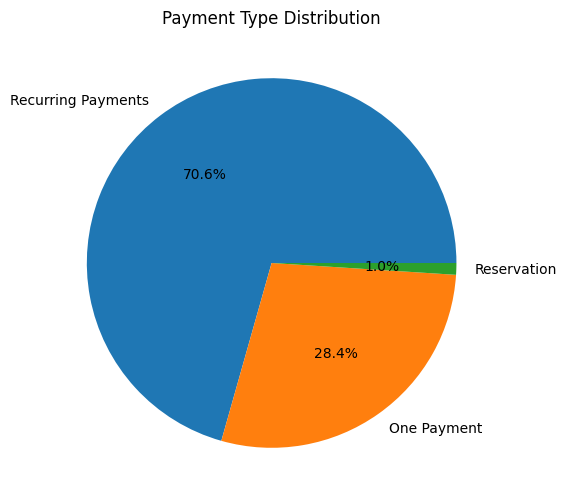

In [80]:
plt.figure(figsize=(10, 6))
plt.pie(deals_df['Payment Type'].value_counts(), labels=deals_df['Payment Type'].value_counts().index, autopct='%1.1f%%')
plt.title('Payment Type Distribution')

plt.show()

# Product

In [81]:
deals_df['Product'].unique()

array([nan, 'Web Developer', 'Digital Marketing', 'UX/UI Design',
       'Find yourself in IT', 'Data Analytics'], dtype=object)

In [82]:
deals_df['Product'].value_counts(dropna=False)

,count
Product,
NaN,17755
Digital Marketing,1967
UX/UI Design,997
Web Developer,567
Find yourself in IT,4
Data Analytics,1


In [83]:
deals_df[deals_df['Product'].isnull()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaT,No,New Lead,No reason,/eng/test,03.07.23women,NaN,v16,women,Facebook Ads,NaN,NaN,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,/at-eng,engwien_AT,26.72,b1-at,21_06_2024,Telegram posts,NaN,NaN,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,60.07,bloggersvideo14com,recentlymoved,Facebook Ads,NaN,NaN,NaN,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,/eng,discovery_DE,53.20,website,NaN,Google Ads,NaN,NaN,NaN,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN
5,5805028000056828429,Paula Underwood,NaT,No,Need a consultation,No reason,/eng,youtube_shorts_DE,93.17,bloggersvideo2june,Com_august,Youtube Ads,NaN,NaN,NaN,2024-06-21 13:02:00,NaN,NaN,NaN,NaN,5805028000056833279,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,5805028000000970006,Jane Smith,2023-07-04,Non Qualified,Lost,Duplicate,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21589,5805028000000948010,Jane Smith,2023-08-29,Medium,Lost,needs time to think,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21590,5805028000000945016,Jane Smith,2023-08-29,High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,81781.98,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:39:00,NaN,NaN,NaN,NaN,5805028000000968001,NaN,NaN
21591,5805028000000927004,Bob Brown,2023-07-09,Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:17:00,NaN,NaN,NaN,NaN,5805028000000961001,NaN,NaN


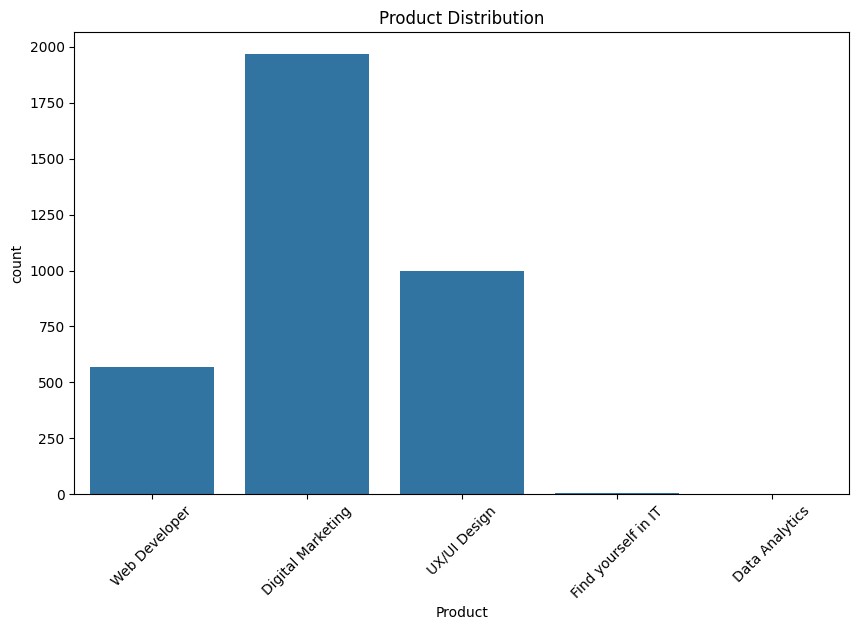

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=deals_df, x='Product')
plt.xticks(rotation=45)
plt.title('Product Distribution')

plt.show()

In [85]:
deals_df[deals_df['Product'] == 'Find yourself in IT']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
3176,5805028000048377930,Quincy Vincent,2024-05-07,Non Target,Lost,Duplicate,/,No campaign,NaN,NaN,NaN,Organic,NaN,Find yourself in IT,NaN,2024-05-06 20:29:00,NaN,NaN,1,NaN,5805028000048410337,NaN,NaN
6095,5805028000042448604,Julia Nelson,2024-05-11,Non Target,Payment Done,Expensive,/page,No campaign,NaN,NaN,NaN,Organic,One Payment,Find yourself in IT,NaN,2024-04-08 17:34:00,NaN,NaN,1,$1.00,5805028000005448163,NaN,NaN
10067,5805028000032304003,Charlie Davis,2024-05-09,Non Target,Lost,Non target,/event,No campaign,NaN,NaN,NaN,Webinar,One Payment,Find yourself in IT,NaN,2024-02-15 19:20:00,NaN,NaN,0,$0.00,5805028000012657064,NaN,NaN
16302,5805028000017521117,Julia Nelson,2024-05-08,Non Target,Lost,Non target,/workshop,No campaign,NaN,NaN,NaN,Webinar,One Payment,Find yourself in IT,NaN,2023-11-17 17:20:00,NaN,NaN,0,$0.00,5805028000005448163,NaN,NaN


In [86]:
filtered_cleaned = deals_df[deals_df['Product'] == 'Find yourself in IT'].dropna()

# Education Type

In [87]:
deals_df['Education Type'].unique()

array([nan, 'Morning', 'Evening'], dtype=object)

In [88]:
deals_df['Education Type'].value_counts(dropna=False)

,count
Education Type,
NaN,18044
Morning,2846
Evening,401


In [89]:
deals_df[deals_df['Education Type'].isnull()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaT,No,New Lead,No reason,/eng/test,03.07.23women,NaN,v16,women,Facebook Ads,NaN,NaN,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,/at-eng,engwien_AT,26.72,b1-at,21_06_2024,Telegram posts,NaN,NaN,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,60.07,bloggersvideo14com,recentlymoved,Facebook Ads,NaN,NaN,NaN,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,/eng,discovery_DE,53.20,website,NaN,Google Ads,NaN,NaN,NaN,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN
5,5805028000056828429,Paula Underwood,NaT,No,Need a consultation,No reason,/eng,youtube_shorts_DE,93.17,bloggersvideo2june,Com_august,Youtube Ads,NaN,NaN,NaN,2024-06-21 13:02:00,NaN,NaN,NaN,NaN,5805028000056833279,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,5805028000000970006,Jane Smith,2023-07-04,Non Qualified,Lost,Duplicate,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21589,5805028000000948010,Jane Smith,2023-08-29,Medium,Lost,needs time to think,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21590,5805028000000945016,Jane Smith,2023-08-29,High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,81781.98,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:39:00,NaN,NaN,NaN,NaN,5805028000000968001,NaN,NaN
21591,5805028000000927004,Bob Brown,2023-07-09,Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:17:00,NaN,NaN,NaN,NaN,5805028000000961001,NaN,NaN


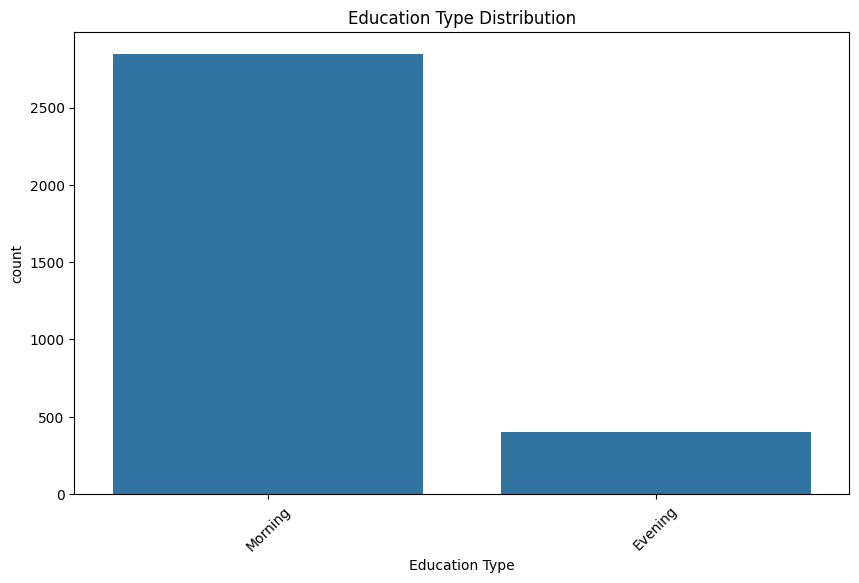

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(data=deals_df, x='Education Type')
plt.xticks(rotation=45)
plt.title('Education Type Distribution')

plt.show()

# Course duration

In [91]:
deals_df['Course duration'].unique()

array([nan,  6., 11.])

In [92]:
deals_df[deals_df['Course duration'].isna()]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaT,No,New Lead,No reason,/eng/test,03.07.23women,NaN,v16,women,Facebook Ads,NaN,NaN,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,/at-eng,engwien_AT,26.72,b1-at,21_06_2024,Telegram posts,NaN,NaN,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,60.07,bloggersvideo14com,recentlymoved,Facebook Ads,NaN,NaN,NaN,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,/eng,discovery_DE,53.20,website,NaN,Google Ads,NaN,NaN,NaN,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN
5,5805028000056828429,Paula Underwood,NaT,No,Need a consultation,No reason,/eng,youtube_shorts_DE,93.17,bloggersvideo2june,Com_august,Youtube Ads,NaN,NaN,NaN,2024-06-21 13:02:00,NaN,NaN,NaN,NaN,5805028000056833279,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,5805028000000970006,Jane Smith,2023-07-04,Non Qualified,Lost,Duplicate,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21589,5805028000000948010,Jane Smith,2023-08-29,Medium,Lost,needs time to think,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21590,5805028000000945016,Jane Smith,2023-08-29,High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,81781.98,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:39:00,NaN,NaN,NaN,NaN,5805028000000968001,NaN,NaN
21591,5805028000000927004,Bob Brown,2023-07-09,Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:17:00,NaN,NaN,NaN,NaN,5805028000000961001,NaN,NaN


In [93]:
# Web developer — только если Course duration = NaN
deals_df.loc[(deals_df['Product'] == 'Web developer') & (deals_df['Course duration'].isna()), 'Course duration'] = 6

# UX/UI — только если Course duration = NaN
deals_df.loc[(deals_df['Product'] == 'UX/UI') & (deals_df['Course duration'].isna()), 'Course duration'] = 11

# Digital Marketing — только если Course duration = NaN
deals_df.loc[(deals_df['Product'] == 'Digital Marketing') & (deals_df['Course duration'].isna()), 'Course duration'] = 10

In [94]:
deals_df['Course duration'].value_counts(dropna = False)

,count
Course duration,
NaN,17760
11.0,2964
6.0,567


# Months of study

In [95]:
deals_df['Months of study'].unique()

array([nan,  1.,  0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [96]:
deals_df['Months of study'].value_counts()

,count
Months of study,
2.0,103
6.0,101
3.0,94
4.0,93
8.0,82
7.0,78
1.0,66
5.0,63
9.0,61


In [97]:
deals_df[deals_df['Months of study'] == 0.0]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
1254,5805028000053813018,Charlie Davis,2024-06-11,Medium,Payment Done,No reason,/email,1006start,426.73,NaN,NaN,CRM,Recurring Payments,UX/UI Design,Evening,2024-06-07 04:55:00,11.0,0.0,300,"$4,000.00",5805028000015298335,Aachen,NaN


In [98]:
#deals_df[deals_df['Months of study'].isnull()]

In [99]:
# Фильтр по условиям
filtered_deals = deals_df.loc[
    (deals_df['Education Type'] == "Morning") &
    (deals_df['Product'] == "Web Developer") &
    (deals_df['Stage'] == "Payment Done"),
    ['Education Type', 'Product', 'Stage', 'Course duration', 'Offer Total Amount', 'Months of study']
]
display(filtered_deals)


,Education Type,Product,Stage,Course duration,Offer Total Amount,Months of study
497,Morning,Web Developer,Payment Done,6.0,"$9,000.00",1.0
833,Morning,Web Developer,Payment Done,6.0,"$9,000.00",1.0
1282,Morning,Web Developer,Payment Done,6.0,"$3,500.00",1.0
1315,Morning,Web Developer,Payment Done,6.0,"$9,000.00",1.0
1484,Morning,Web Developer,Payment Done,6.0,"€ 2.900,00",1.0
...,...,...,...,...,...,...
16476,Morning,Web Developer,Payment Done,6.0,"$5,000.00",6.0
16791,Morning,Web Developer,Payment Done,6.0,"$5,000.00",6.0
17424,Morning,Web Developer,Payment Done,6.0,"$5,000.00",6.0
17792,Morning,Web Developer,Payment Done,6.0,"$9,000.00",4.0


In [100]:
deals_df['Offer Total Amount'].value_counts()

,count
Offer Total Amount,
"$11,000.00",1826
$0.00,831
"$11,500.00",392
"$5,000.00",291
"$4,000.00",251
"$3,500.00",133
"$9,000.00",114
"$2,500.00",68
"$2,000.00",62


In [101]:
def convert_currency_to_float(value):
    """Функция преобразует строку с валютой в число, убирая символы '$' и '€'."""
    if pd.isna(value) or not isinstance(value, str):
        return np.nan  # Возвращаем NaN, если значение отсутствует или не является строкой

    try:
        # Убираем символ валюты и возможные разделители тысяч (',') и заменяем ',' или '.' на '.' для корректного преобразования
        clean_value = value.replace('$', '').replace('€', '').replace(',', '').strip()
        return float(clean_value)
    except ValueError:
        return np.nan  # Возвращаем NaN в случае ошибки преобразования

# Применяем функцию к нужным колонкам
deals_df['Offer Total Amount'] = deals_df['Offer Total Amount'].apply(convert_currency_to_float)
deals_df['Initial Amount Paid'] = deals_df['Initial Amount Paid'].apply(convert_currency_to_float)

# Проверяем результат
deals_df[['Offer Total Amount', 'Initial Amount Paid']].head()

,Offer Total Amount,Initial Amount Paid
0,NaN,NaN
1,2000.0,0.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [102]:
deals_df['Initial Amount Paid'].value_counts()

,count
Initial Amount Paid,
1000.0,2584
0.0,859
300.0,187
500.0,94
350.0,82
2000.0,58
11000.0,36
200.0,28
11500.0,25


In [103]:
deals_df['Offer Total Amount'].value_counts()

,count
Offer Total Amount,
11000.0,1826
0.0,831
11500.0,392
5000.0,291
4000.0,251
3500.0,133
9000.0,114
2500.0,68
2000.0,62


In [104]:
deals_df.loc[deals_df['Offer Total Amount'] == 1139800, 'Offer Total Amount'] = 11398

In [105]:
deals_df['Offer Total Amount'].value_counts()

,count
Offer Total Amount,
11000.0,1826
0.0,831
11500.0,392
5000.0,291
4000.0,251
3500.0,133
9000.0,114
2500.0,68
2000.0,62


In [106]:
deals_df[deals_df['Offer Total Amount'] == 0.0]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
10067,5805028000032304003,Charlie Davis,2024-05-09,Non Target,Lost,Non target,/event,No campaign,NaN,NaN,NaN,Webinar,One Payment,Find yourself in IT,NaN,2024-02-15 19:20:00,NaN,NaN,0.0,0.0,5805028000012657064,NaN,NaN
13341,5805028000023894658,Julia Nelson,2024-01-19,Non Target,Lost,Non target,/eng,No campaign,NaN,NaN,NaN,Organic,Recurring Payments,Digital Marketing,Evening,2024-01-02 11:01:00,11.0,NaN,9.0,0.0,5805028000005448163,NaN,NaN
15548,5805028000018379943,Paula Underwood,2023-11-23,Non Qualified,Lost,Invalid number,eng/digital-marketing,No campaign,NaN,NaN,NaN,Organic,NaN,NaN,NaN,2023-11-23 10:48:00,NaN,NaN,0.0,0.0,5805028000000907006,NaN,NaN
16302,5805028000017521117,Julia Nelson,2024-05-08,Non Target,Lost,Non target,/workshop,No campaign,NaN,NaN,NaN,Webinar,One Payment,Find yourself in IT,NaN,2023-11-17 17:20:00,NaN,NaN,0.0,0.0,5805028000005448163,NaN,NaN
20608,5805028000004428023,Charlie Davis,2023-08-15,Non Qualified,Lost,Stopped Answering,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,1016.73,region,NaN,Google Ads,NaN,NaN,NaN,2023-08-10 20:10:00,NaN,NaN,0.0,0.0,5805028000004409061,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21565,5805028000001210014,Jane Smith,2023-07-12,Medium,Lost,Expensive,/eng,No campaign,NaN,NaN,NaN,SMM,NaN,NaN,NaN,2023-07-07 07:40:00,NaN,NaN,0.0,0.0,5805028000001211013,NaN,NaN
21569,5805028000001135001,Ian Miller,2023-07-21,Non Qualified,Lost,Duplicate,eng/digital-marketing,02.07.23wide_DE,0.88,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-06 15:43:00,NaN,NaN,0.0,0.0,5805028000001129001,NaN,NaN
21570,5805028000001023223,Ian Miller,2023-07-17,Medium,Lost,Stopped Answering,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,0.58,region,NaN,Google Ads,NaN,NaN,NaN,2023-07-06 14:16:00,NaN,NaN,0.0,0.0,5805028000001079118,NaN,NaN
21571,5805028000001078162,Jane Smith,2023-07-08,Non Target,Lost,Stopped Answering,eng/digital-marketing,02.07.23wide_DE,NaN,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-06 14:14:00,NaN,NaN,0.0,0.0,5805028000001076115,NaN,NaN


In [107]:
deals_df['Initial Amount Paid'].value_counts(dropna=False)

,count
Initial Amount Paid,
NaN,17189
1000.0,2584
0.0,859
300.0,187
500.0,94
350.0,82
2000.0,58
11000.0,36
200.0,28


In [108]:
web_paid = deals_df.loc[(deals_df['Product'] == 'Digital Marketing') & (deals_df['Stage'] == 'Payment Done')& (deals_df['Months of study'].isnull())]
web_paid

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch


In [109]:
deals_df.loc[deals_df['Initial Amount Paid'] > 200, 'Stage'] = 'Payment Done'

In [110]:
deals_sorted = deals_df.sort_values(
    by=['Offer Total Amount', 'Initial Amount Paid'],
    ascending=[False, False]
)
deals_cleaned = deals_sorted.drop_duplicates(subset='Contact Name', keep='first')
deals_cleaned = deals_cleaned.reset_index(drop=True)
deals_cleaned

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000007843060,Ulysses Adams,NaT,Medium,Payment Done,Stopped Answering,eng/digital-marketing,04.07.23recentlymoved_DE,1.00,b6,recentlymoved,Facebook Ads,NaN,Digital Marketing,Morning,2023-09-15 13:21:00,11.0,NaN,1500.0,11500.0,5805028000007854069,-,NaN
1,5805028000007754120,Cara Iverson,2023-11-12,Low,Payment Done,needs time to think,eng/digital-marketing,work_DE,833.42,b6,13_09_2023,Telegram posts,NaN,Digital Marketing,NaN,2023-09-14 22:10:00,11.0,NaN,1500.0,11500.0,5805028000007742068,NaN,NaN
2,5805028000007744074,Jane Smith,2023-10-18,Low,Payment Done,needs time to think,eng/digital-marketing,work_DE,32.60,b6,13_09_2023,Telegram posts,NaN,Digital Marketing,NaN,2023-09-14 20:20:00,11.0,NaN,1500.0,11500.0,5805028000007761132,NaN,NaN
3,5805028000007647107,Jane Smith,2023-09-14,Medium,Payment Done,Doesn't Answer,eng/digital-marketing,youtube_shorts_DE,NaN,ad_da_1,Com_august,Youtube Ads,NaN,Digital Marketing,NaN,2023-09-14 14:58:00,11.0,NaN,1500.0,11500.0,5805028000007649089,NaN,NaN
4,5805028000007623014,Jane Smith,2023-09-14,Non Target,Payment Done,Thought for free,eng/digital-marketing,youtube_shorts_DE,168.05,ad_da_1,Com_august,Youtube Ads,NaN,Digital Marketing,NaN,2023-09-14 09:30:00,11.0,NaN,1500.0,11500.0,5805028000007595085,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17886,5805028000001037002,Diana Evans,2023-09-07,High,Lost,Changed Decision,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,1389.47,NaN,_,Google Ads,NaN,NaN,NaN,2023-07-05 15:36:00,NaN,NaN,NaN,NaN,5805028000001023002,NaN,NaN
17887,5805028000000933086,Ian Miller,2023-09-21,Low,Lost,Expensive,eng/digital-marketing,02.07.23wide_DE,2272.20,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-04 22:03:00,NaN,NaN,NaN,NaN,5805028000000964068,NaN,NaN
17888,5805028000000963032,Ian Miller,2023-09-25,High,Lost,Stopped Answering,eng/digital-marketing,02.07.23wide_DE,2822.95,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-04 12:57:00,NaN,NaN,NaN,NaN,5805028000000942003,NaN,NaN
17889,5805028000000935025,Kevin Parker,2023-07-06,Non Qualified,Lost,Doesn't Answer,eng/digital-marketing,02.07.23wide_DE,NaN,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-04 09:34:00,NaN,NaN,NaN,NaN,5805028000000983028,NaN,NaN


проверка оплат / меняю местами оффер и первую оплату там где оффер не равен 0

In [111]:
payment_mist = deals_df[(deals_df['Offer Total Amount']) < (deals_df['Initial Amount Paid'])]
payment_mist

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
494,5805028000055525099,Eva Kent,NaT,Medium,Waiting For Payment,No reason,/webinar,webinar1906,7039.77,NaN,invitation,Webinar,NaN,Web Developer,Morning,2024-06-15 13:50:00,6.0,NaN,100.0,2.9,5805028000055474262,"Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a",NaN
1279,5805028000053717506,Ben Hall,NaT,Low,Payment Done,No reason,/direct,blog2_DE,108.60,NaN,30_05_2024,SMM,NaN,Web Developer,Morning,2024-06-06 14:53:00,6.0,NaN,3000.0,2.9,5805028000053715483,NaN,NaN
1393,5805028000053561185,Cara Iverson,2024-06-07,Non Target,Payment Done,Non target,/eng,Berlin_DE,342.85,b6,01_02_2024,Telegram posts,NaN,UX/UI Design,Morning,2024-06-05 08:50:00,11.0,NaN,11500.0,11000.0,5805028000053534166,Zwickau,NaN
1409,5805028000053462041,Charlie Davis,NaT,Non Target,Payment Done,Gutstein refusal,/eng,performancemax_eng_DE,802.18,region,NaN,Google Ads,NaN,UX/UI Design,Morning,2024-06-04 21:24:00,11.0,NaN,11500.0,11000.0,5805028000053471005,Aschaffenburg,Б2
1440,5805028000053242748,Cara Iverson,NaT,High,Payment Done,No reason,/direct,blog2_DE,39.05,NaN,30_05_2024,SMM,NaN,UX/UI Design,Morning,2024-06-04 12:48:00,11.0,NaN,11500.0,11000.0,5805028000053244895,Straubing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,5805028000012569001,Julia Nelson,2023-10-24,High,Payment Done,No reason,eng/digital-marketing,04.07.23recentlymoved_DE,14.62,bloggersvideo4com,recentlymoved,Facebook Ads,Recurring Payments,Digital Marketing,Evening,2023-10-19 12:04:00,11.0,9.0,300.0,2.9,5805028000012562006,Karlsfeld,NaN
17847,5805028000012445103,Charlie Davis,2023-10-31,Low,Payment Done,Stopped Answering,/eng/ux-ui,12.09.23interests_Uxui_DE,902.05,bloggersvideo5,interest_work_WebDev,Facebook Ads,Recurring Payments,Digital Marketing,Evening,2023-10-18 20:48:00,11.0,NaN,300.0,2.9,5805028000012456028,NaN,NaN
18364,5805028000010428914,Kevin Parker,2023-10-16,High,Payment Done,No reason,eng/digital-marketing,02.07.23wide_DE,62.82,bloggersvideo4com,wide,Facebook Ads,One Payment,Digital Marketing,Morning,2023-10-08 18:53:00,11.0,9.0,2000.0,2.9,5805028000011223073,Hamburg,NaN
18642,5805028000009899058,Charlie Davis,2023-10-06,Low,Payment Done,No reason,/eng/career,Trigger_DE,2753.37,ntc1,NaN,CRM,Recurring Payments,Digital Marketing,Evening,2023-10-03 16:16:00,11.0,4.0,300.0,2.9,5805028000009910001,Wangen im Allgäu,NaN


In [112]:
condition = (deals_df['Offer Total Amount'] < deals_df['Initial Amount Paid']) & (deals_df['Offer Total Amount'].isnull())
deals_df.loc[condition, ['Offer Total Amount', 'Initial Amount Paid']] = deals_df.loc[condition, ['Initial Amount Paid', 'Offer Total Amount']].values
deals_df

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaT,No,New Lead,No reason,/eng/test,03.07.23women,NaN,v16,women,Facebook Ads,NaN,NaN,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaT,No,New Lead,No reason,/at-eng,No campaign,NaN,NaN,NaN,Organic,NaN,Web Developer,Morning,2024-06-21 15:23:00,6.0,NaN,0.0,2000.0,5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,Non Target,Lost,Non target,/at-eng,engwien_AT,26.72,b1-at,21_06_2024,Telegram posts,NaN,NaN,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,2024-06-21,Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,60.07,bloggersvideo14com,recentlymoved,Facebook Ads,NaN,NaN,NaN,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,2024-06-21,Non Target,Lost,Non target,/eng,discovery_DE,53.20,website,NaN,Google Ads,NaN,NaN,NaN,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,5805028000000970006,Jane Smith,2023-07-04,Non Qualified,Lost,Duplicate,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21589,5805028000000948010,Jane Smith,2023-08-29,Medium,Lost,needs time to think,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,NaN,NaN,NaN,NaN,5805028000000979006,NaN,NaN
21590,5805028000000945016,Jane Smith,2023-08-29,High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,81781.98,b3,wide,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:39:00,NaN,NaN,NaN,NaN,5805028000000968001,NaN,NaN
21591,5805028000000927004,Bob Brown,2023-07-09,Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,women,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:17:00,NaN,NaN,NaN,NaN,5805028000000961001,NaN,NaN


In [113]:
Amount = deals_df[['Initial Amount Paid', 'Months of study', 'Offer Total Amount']].value_counts()
Amount

Initial Amount Paid  Months of study  Offer Total Amount
1000.0               8.0              11000.0               49
                     7.0              11000.0               46
                     2.0              11000.0               42
                     6.0              11000.0               39
                     3.0              11000.0               37
                                                            ..
11000.0              1.0              11000.0                1
                     4.0              11000.0                1
                     6.0              1200.0                 1
                     8.0              1200.0                 1
11500.0              1.0              11000.0                1
Name: count, Length: 183, dtype: int64

In [114]:
# заполнила знвчение по условию
deals_df.loc[
    (deals_df['Initial Amount Paid']>= 1000) & (deals_df['Months of study'].isna()),
    'Months of study'
] = 3

In [115]:
deals_df[deals_df['Months of study']==3]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
56,5805028000056683030,Charlie Davis,NaT,Low,Payment Done,No reason,/eng/test,performancemax_eng_DE,20.65,region,NaN,Google Ads,NaN,Web Developer,Morning,2024-06-20 12:34:00,6.0,3.0,1000.0,9000.0,5805028000056690015,Crailsheim,NaN
60,5805028000056558351,Ulysses Adams,NaT,Low,Payment Done,No reason,/eng,No campaign,9.82,NaN,NaN,SMM,NaN,Web Developer,Morning,2024-06-20 11:16:00,6.0,3.0,1000.0,9000.0,5805028000056578244,Dortmund,в1
65,5805028000056555140,Paula Underwood,NaT,Medium,Payment Done,No reason,/eng,03.07.23women,115.18,v16,women,Facebook Ads,NaN,Digital Marketing,Morning,2024-06-20 08:48:00,11.0,3.0,1000.0,11000.0,5805028000056576103,Stuttgart,NaN
71,5805028000056564131,Ben Hall,NaT,Non Target,Payment Done,No reason,/eng,20.05.24interests_DE,771.65,bloggersvideo14com,interest_work,Facebook Ads,NaN,UX/UI Design,Morning,2024-06-19 22:31:00,11.0,3.0,1000.0,11000.0,5805028000056575100,München,A2
75,5805028000056590062,Paula Underwood,NaT,Medium,Payment Done,No reason,eng/digital-marketing,brand_search_eng_DE,NaN,region,it career hub,Google Ads,NaN,Digital Marketing,Morning,2024-06-19 20:25:00,11.0,3.0,1000.0,11000.0,5805028000056570036,Berlin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21566,5805028000001230001,Jane Smith,2023-10-18,Medium,Payment Done,Changed Decision,eng/digital-marketing,02.07.23wide_DE,169.18,b3,wide,Facebook Ads,NaN,Digital Marketing,NaN,2023-07-07 07:23:00,11.0,3.0,1000.0,11500.0,5805028000001204049,NaN,NaN
21567,5805028000001225001,Oliver Taylor,NaT,Medium,Payment Done,Stopped Answering,eng/digital-marketing,02.07.23wide_DE,237.60,b3,wide,Facebook Ads,NaN,Digital Marketing,NaN,2023-07-07 06:53:00,11.0,3.0,1000.0,11500.0,5805028000001204013,NaN,NaN
21574,5805028000001020028,Jane Smith,2023-11-03,Low,Payment Done,Changed Decision,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,1966.90,region,NaN,Google Ads,NaN,Digital Marketing,NaN,2023-07-06 04:14:00,11.0,3.0,1000.0,11500.0,5805028000001079018,NaN,NaN
21578,5805028000001040014,Quincy Vincent,2023-07-14,Low,Payment Done,Conditions are not suitable,eng/digital-marketing,02.07.23wide_DE,12622.27,b3,wide,Facebook Ads,NaN,Digital Marketing,Morning,2023-07-05 18:06:00,11.0,3.0,1000.0,11000.0,5805028000001073001,Brake,NaN


# City

https://simplemaps.com/data/world-cities

In [116]:
#deals_df = pd.read_csv('drive/MyDrive/Final_Project_ICH/CSV_file/Deals.csv', dtype={"Id": str, 'Contact Name': str})

In [117]:
deals_df['City'].value_counts()

,count
City,
-,343
Berlin,181
München,73
Hamburg,62
Leipzig,45
...,...
Leuna,1
Speichersdorf,1
Heinersreuth,1


In [118]:
deals_df['City'].unique()
# deals_df['City'].value_counts()
# deals_df['City'].isnull().sum()

array([nan, 'Crailsheim', 'Dortmund', 'Stuttgart', 'München', 'Berlin',
       'Wien', 'Offenbach am Main', 'Eberbach', 'Görlitz', 'Pfedelbach',
       'Unterhaching',
       'Karl-Liebknecht str. 24, Hildburghausen, Thüringen',
       'Rüdesheim am Rhein', 'Dresden', 'Gummersbach', '-', 'Kassel',
       'Wenzenbach', 'Merseburg', 'Gommern', 'Pommelsbrunn',
       'Herzogenrath', 'Schwandorf', 'Mainz', 'Podskalie', 'Zinnowitz',
       'Quedlinburg', 'Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a',
       'Wolfsburg', 'Weilburg', 'Dillenburg', 'Neu-Ulm',
       'Lauter-Bernsbach', 'Bonn', 'Riedstadt', 'Rosenheim',
       'Mönchengladbach', 'Neuburg', 'Rostock', 'Bad Oeynhausen',
       'Chemnitz', 'Diez', 'Nürnberg', 'Laubach', 'Düren', 'Düsseldorf',
       'Zwickau', 'Bremen', 'Halle', 'Erbach', 'Jünkerath', 'Magdeburg',
       'Celle', 'Germering', 'Kleve', 'Leinfelden-Echterdingen',
       'Garmisch-Partenkirchen', 'Leipzig', 'Hof', 'Lünen', 'Murr',
       'Bochum', 'Leonberg', 'Bad Ho

In [119]:
# Заменяем адреса на названия городов
address_to_city = {
    'Karl-Liebknecht str. 24, Hildburghausen, Thüringen': 'Hildburghausen',
    'Vor Ebersbach 1, 77761 Schiltach': 'Schiltach',
    'Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a': 'Gdańsk'
}
deals_df["City"] = deals_df["City"].replace(address_to_city)

In [120]:
import requests
import json

In [121]:
# Загрузка списка городов Германии
germany_cities_path = "drive/MyDrive/Final_Project_ICH/CSV_file/germany.json"
with open(germany_cities_path, "r", encoding="utf-8") as f:
    germany_cities_data = json.load(f)

germany_city_map = {city["name"]: "Germany" for city in germany_cities_data}

# Загрузка данных о городах мира
cities_url = "https://pkgstore.datahub.io/core/world-cities/world-cities_json/data/5b3dd46ad10990bca47b04b4739a02ba/world-cities_json.json"
response = requests.get(cities_url)
world_cities_data = response.json()

# Глобальный словарь город → страна
world_city_map = {city['name']: city['country'] for city in world_cities_data}


# Заменяем '-' на 'Unknown'
deals_df["City"] = deals_df["City"].replace("-", "Unknown")

# Шаг 1: ищем города в Германии
deals_df["Country"] = deals_df["City"].map(germany_city_map)

# Шаг 2: где не найдено — ищем в мировом списке
deals_df["Country"] = deals_df["Country"].fillna(deals_df["City"].map(world_city_map))

# Шаг 3: где не найдено вообще — ставим 'Other'
deals_df["Country"] = deals_df["Country"].fillna("Other")

In [122]:
filtered_df = deals_df[(deals_df['Country'] == 'Other') & (deals_df['City'].notna())]
filtered_df.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Country
71,5805028000056564131,Ben Hall,NaT,Non Target,Payment Done,No reason,/eng,20.05.24interests_DE,771.65,bloggersvideo14com,interest_work,Facebook Ads,NaN,UX/UI Design,Morning,2024-06-19 22:31:00,11.0,3.0,1000.0,11000.0,5805028000056575100,München,A2,Other
82,5805028000056496090,Paula Underwood,NaT,Medium,Payment Done,No reason,/eng,blog_DE,1059.37,NaN,19_06_2024,Bloggers,NaN,Digital Marketing,Morning,2024-06-19 18:23:00,11.0,3.0,1000.0,11000.0,5805028000056487259,München,NaN,Other
94,5805028000056362332,Eva Kent,NaT,Low,Waiting For Payment,No reason,/at-eng,17.03.24wide_AT,49.43,bloggersvideo16com_at,wide,Facebook Ads,NaN,UX/UI Design,Morning,2024-06-19 13:08:00,11.0,NaN,3.5,3500.0,5805028000050559164,Wien,NaN,Other
128,5805028000056162746,Ben Hall,NaT,Medium,Payment Done,No reason,/specialoffer,webinar1906,7.40,NaN,NaN,Webinar,NaN,Web Developer,Morning,2024-06-18 20:13:00,6.0,NaN,500.0,3500.0,5805028000056177977,Pfedelbach,NaN,Other
171,5805028000056175409,Charlie Davis,NaT,Low,Payment Done,No reason,eng/digital-marketing,No campaign,12.37,NaN,NaN,Organic,NaN,UX/UI Design,Morning,2024-06-18 15:12:00,11.0,3.0,1000.0,11000.0,5805028000056159419,Rüdesheim am Rhein,NaN,Other


In [123]:
deals_df['City'].isnull().sum()

np.int64(18817)

In [124]:
filtered_df = deals_df[(deals_df['Country'] == 'Other') & (deals_df['City'] != 'Unknown') & (deals_df['City'].notna())]
filtered_df

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Country
71,5805028000056564131,Ben Hall,NaT,Non Target,Payment Done,No reason,/eng,20.05.24interests_DE,771.65,bloggersvideo14com,interest_work,Facebook Ads,NaN,UX/UI Design,Morning,2024-06-19 22:31:00,11.0,3.0,1000.0,11000.0,5805028000056575100,München,A2,Other
82,5805028000056496090,Paula Underwood,NaT,Medium,Payment Done,No reason,/eng,blog_DE,1059.37,NaN,19_06_2024,Bloggers,NaN,Digital Marketing,Morning,2024-06-19 18:23:00,11.0,3.0,1000.0,11000.0,5805028000056487259,München,NaN,Other
94,5805028000056362332,Eva Kent,NaT,Low,Waiting For Payment,No reason,/at-eng,17.03.24wide_AT,49.43,bloggersvideo16com_at,wide,Facebook Ads,NaN,UX/UI Design,Morning,2024-06-19 13:08:00,11.0,NaN,3.5,3500.0,5805028000050559164,Wien,NaN,Other
128,5805028000056162746,Ben Hall,NaT,Medium,Payment Done,No reason,/specialoffer,webinar1906,7.40,NaN,NaN,Webinar,NaN,Web Developer,Morning,2024-06-18 20:13:00,6.0,NaN,500.0,3500.0,5805028000056177977,Pfedelbach,NaN,Other
171,5805028000056175409,Charlie Davis,NaT,Low,Payment Done,No reason,eng/digital-marketing,No campaign,12.37,NaN,NaN,Organic,NaN,UX/UI Design,Morning,2024-06-18 15:12:00,11.0,3.0,1000.0,11000.0,5805028000056159419,Rüdesheim am Rhein,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20895,5805028000003551203,Ulysses Adams,2023-08-21,Medium,Payment Done,Stopped Answering,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,295.43,region,NaN,Google Ads,Recurring Payments,Digital Marketing,Evening,2023-08-02 10:39:00,11.0,11.0,350.0,3500.0,5805028000003597256,Eggolsheim,NaN,Other
20976,5805028000003425418,Ulysses Adams,2023-08-10,Low,Payment Done,No reason,eng/digital-marketing,youtube_shorts_DE,826.12,ad2,Com_july_1,Youtube Ads,Recurring Payments,Digital Marketing,Evening,2023-07-30 22:33:00,11.0,1.0,350.0,3500.0,5805028000003473428,Biberach,NaN,Other
21253,5805028000002698098,Nina Scott,2023-07-21,Low,Lost,Expensive,eng/digital-marketing,15.07.23b_DE,142.98,b2com,b,Facebook Ads,NaN,NaN,NaN,2023-07-21 07:43:00,NaN,NaN,0.0,0.0,5805028000001404153,Pfedelbach,NaN,Other
21299,5805028000002308081,Nina Scott,2023-07-19,Low,Payment Done,Expensive,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,339.03,region,NaN,Google Ads,NaN,UX/UI Design,Morning,2023-07-19 09:01:00,11.0,3.0,1000.0,11000.0,5805028000002286243,München,NaN,Other


In [125]:
deals_df.loc[deals_df['City'] == 'Neuburg', 'City'] = 'Neuburg an der Donau'

In [126]:
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'München'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Rotenburg an der Fulda'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Langenbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kressbronn am Bodensee'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Helmstidde'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Nuenchritz'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Stelle'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Blankenfelde'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Pleinfeld'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Eystrup'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Neuhemsbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kisslegg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Sollstedt'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Wörthsee'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Fernwald'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Mainz-Kastel'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Aichwald'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Reichenau'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Schlangen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Murr'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Poppenhausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Morsbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Karstädt'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Großrosseln'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Poing'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Scharbeutz'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Griepswohld'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hettenshausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Garrel'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Obergriesbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Untersiemau'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Massenbachhausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Oberding'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Heinersreuth'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Remchingen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Rötgesbüttel'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Königsmoos'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Inchenhofen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Schwaig'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Pfalzgrafenweiler'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Weinähr'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Speichersdorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lenningen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Sandersdorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kirchlauter'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Mandelbachtal'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Rangsdorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Neuenkirchen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Herrsching am Ammersee'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Haimhausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Nünchritz'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Nebra (Unstrut)'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Buttstädt'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Limeshain'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kirchlinteln'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Planegg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Sexau'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Zorneding'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kirchheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Appen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Heimbuchenthal'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Mainz-Kostheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bad Emstal'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Wiefelstede'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Engelsbrand'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Dörverden'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Neunkirchen-Seelscheid'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Obergünzburg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Floß'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Ostbevern'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Cremlingen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Rosengarten'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Niedereschach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hösbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kirchheim bei München'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Veldenz'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Münchhausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Meinersen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Unterschneidheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lauf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hattgenstein'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hofkirchen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Postbauer-Heng'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Mömlingen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Vierden'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Wolnzach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Triberg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Höhenkirchen-Siegertsbrunn'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hildburghausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Obernheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Aldenhoven'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Oberrot'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Obermarchtal'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Pfaffenhofen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Neuhäusel'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Dußlingen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Ottersweier'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kleinostheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Espenau'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Litzendorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Pfinztal'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Randersacker'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Euerbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Buchholz'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lotte'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bad Abbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Maasbree'), 'Country'] = 'Niederlande'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bad Feilnbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Nesselwang'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Sand am Main'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Binzen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Adelebsen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kluse'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Sigmarszell'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Odelzhausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Niederorschel'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Wien'), 'Country'] = 'Austria'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bruck'), 'Country'] = 'Austria'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Übelbach'), 'Country'] = 'Austria'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Linz'), 'Country'] = 'Austria'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Liederbach am Taunus'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Dettenhausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Dinkelscherben'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Imsbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Ehrensberg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Retzstadt'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Pyrbaum'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Grafenhausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Friedenweiler'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Viereth-Trunstadt'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Glandorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Offenbach am Main'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Rohrdorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Mengerskirchen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hohenberg an der Eger'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Nisterberg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Nellingen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Warszawa'), 'Country'] = 'Poland'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Manching'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Uhldingen-Mühlhofen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hopfen am See'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Sasbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kappelrodeck'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Eching'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kernen im Remstal'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Molsberg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Wiesenttal'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bingen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Maikammer'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hüttisheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Mainaschaff'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Stadecken-Elsheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Aidlingen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Schonach im Schwarzwald'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Freigericht'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Causeni'), 'Country'] = 'Moldawien'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Ampfing'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Furtwangen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Witzeeze'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Pfedelbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Schliersee'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Essing'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Urbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Wittendörp'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Pullach im Isartal'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Zetel'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Winhöring'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Altenstadt'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Eiterfeld'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Raschau-Markersbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Sankt Leon-Rot'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Nienburg/Weser'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bad Hindelang'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Birstein'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Rommerskirchen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Altshausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hasbergen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Meißenheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Südlohn'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Thalmassing'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Isernhagen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lutherstadt Eisleben'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Mutlangen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Rust'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Büchen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Burbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Rüdesheim am Rhein'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Berchtesgaden'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Michelfeld'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Schwepnitz'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Wenzenbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lehre'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Adelschlag'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Schwandorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Pommelsbrunn'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Heidenheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hallbergmoos'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Edingen-Neckarhausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Alsbach-Hähnlein'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Przesław'), 'Country'] = 'Poland'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bialystok'), 'Country'] = 'Poland'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Piatek'), 'Country'] = 'Poland'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Włodawa'), 'Country'] = 'Poland'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Gdańsk'), 'Country'] = 'Poland'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Paderborn'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Gommern'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Zinnowitz'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Eisenbach (Hochschwarzwald)'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Weilburg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Podskalie'), 'Country'] = 'Slovakia'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Neuburg an der Donau'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lutherstadt Wittenberg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lauter-Bernsbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Düsseldorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Jünkerath'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Diez'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lierschied'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Frammersbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Aying'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Einhausen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Frammersbach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hartmannsdorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Tönning'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Klosterlechfeld'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Villingen‑Schwenningen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Theres'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Waldbronn'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Frankfurt'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Hohenstein'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Biberach'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Eggolsheim'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Tutzing'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Eschenburg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Malschwitz'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Apen'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bernau'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Trebgast'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bad Wildbad im Schwarzwald'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Jördenstorf'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lindau (Bodensee)'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lichtenfels'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Achberg'), 'Country'] = 'Germany'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Igalo'), 'Country'] = 'Montenegro'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Alamudun'), 'Country'] = 'Kyrgyzstan'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Almaty'), 'Country'] = 'Kazakhstan'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Semej'), 'Country'] = 'Kazakhstan'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Prostejov'), 'Country'] = 'Czechia'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Jindrichuv Hradec'), 'Country'] = 'Czechia'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Chuguev'), 'Country'] = 'Ukraine'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kamenskoe'), 'Country'] = 'Ukraine'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Kalanchak'), 'Country'] = 'Ukraine'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Pavlograd'), 'Country'] = 'Ukraine'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Rechitsa'), 'Country'] = 'Belarus'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Bat yam'), 'Country'] = 'Israel'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Duschanbe'), 'Country'] = 'Tadschikistan'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Nizhny Novgorod'), 'Country'] = 'Russia'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Ahad Al Masarihah'), 'Country'] = 'Saudi Arabia'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Dabrowa Gornicza'), 'Country'] = 'Poland'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Lubrza'), 'Country'] = 'Poland'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Klasztorna'), 'Country'] = 'Poland'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Tatabanya'), 'Country'] = 'Hungary'
deals_df.loc[(deals_df['Country'] == 'Other') & (deals_df['City'] == 'Chambon-sur-Lignon'), 'Country'] = 'France'

In [127]:
deals_df['City'].value_counts(dropna = False)

,count
City,
NaN,18817
Unknown,343
Berlin,181
München,73
Hamburg,62
...,...
Radebeul,1
Korbach,1
Landau an der Isar,1


In [128]:
deals_df['City'] = deals_df['City'].fillna('Unknown')

In [129]:
deals_df['Country'].value_counts()

,count
Country,
Other,19160
Germany,2046
Poland,22
Austria,15
United States,6
Russia,6
Ukraine,5
Kazakhstan,4
United Arab Emirates,2


In [130]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21291 entries, 0 to 21592
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Page                 21291 non-null  object        
 7   Campaign             21291 non-null  object        
 8   SLA                  15276 non-null  float64       
 9   Content              13938 non-null  object        
 10  Term                 12242 non-null  object        
 11  Source               21291 non-null  object        
 12  Payment Type         490 non-null    object        
 13  Product              3536 non-null  

# Level of Deutsch

In [131]:
deals_df['Level of Deutsch'].value_counts(dropna=False)

,count
Level of Deutsch,
NaN,20063
B1,212
б1,116
в1,100
b1,92
...,...
"точно уровень не знаю, но говорить могу - учила сама",1
А2-В1 учит,1
В1 (учится на В2 уже),1


In [132]:
print(deals_df['Level of Deutsch'].nunique())

214


In [133]:
print(deals_df['Level of Deutsch'].unique())

[nan 'в1' 'A2' 'б1' 'b1' 'B1' 'в1-в2' 'B2' 'C2' 'с1' 'Б1' 'а2' 'а1' 'а0'
 'б2' 'Б2' 'В1' 'А2' 'B1 будет в феврале 2025'
 'Detmold, Paulinenstraße 95, 32756'
 'Сам оценивает на B2, 13 лет живет в Германии' 'в2' 'В1-В2'
 'Б1 ( ждет Б2)' 'А2-В1'
 'lэкзамен - 6 июля на В1. курсы вечером (но уверенно говорит на B1)'
 'Гражданка Германии уже год в Германии Учит немецкий и в сентябре b1 через гос-во проходит, а не через ДЖЦ, вечером учится 3 р в неделю с 18 до 21'
 '-' 'А2 ( Б1 в июне)' 'B1 в процессе обучения'
 'ЯЗ: нем В1 был экз 03.05 повтор и сейчас ждет результаты. Технический англ был. А1 сейчас. ОБР: 2 во информационные и комп сети - инженер системоте'
 'В1 в сентябре' 'Нет' 'С1' '0' 'Ждем B1' 'А1 сертиф, но по факту А2' 'a2'
 'Пока А2, сдает 17 05 B1' 'окончание 13.06 курса на b1' 'A1' 'b2'
 'Thorn-Prikker-Str. 30, Hagen, 58093' 'В2'
 'нулевой уровень, только пошел на курсы.' 'ая в1' 'Ждет результат по B1'
 'А2( ждет итоги Б!)' 'b1 экзамен будет 12 апреля' 'b1 (b2 ждет серт)'
 'С2' 'ж

In [134]:
deals_df['Level of Deutsch'].value_counts().sum()

np.int64(1228)

In [135]:
import re

# 1. Извлекаем уровень в буквенном виде (A1, B2 и т.д.)
def extract_language_level(x):
    if not isinstance(x, str):
        return 'Unknown'

    x = x.lower().strip()
    translit_map = {'а': 'a', 'б': 'b', 'в': 'b', 'с': 'c'}
    for cyr, lat in translit_map.items():
        x = x.replace(cyr, lat)

    x = re.sub(r'(ждет|результат|экзамен|учится|сдавал|процесс|сертификат|курс|уровень|говорит|учит|сейчас|будет|идет|не сдавал)', '', x)

    match = re.search(r'\b(a1|a2|b1|b2|c1|c2)\b', x)
    return match.group(1).upper() if match else 'Unknown'

# 2. Преобразуем текстовый уровень в число
def classify_level(level):
    level_map = {'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'C1': 5, 'C2': 6}
    return level_map.get(level, np.nan)

# Применяем
deals_df['Deutsch Level'] = deals_df['Level of Deutsch'].apply(extract_language_level)
deals_df['Deutsch Category'] = deals_df['Deutsch Level'].apply(classify_level)


In [136]:
deals_df[['Deutsch Level', 'Deutsch Category']].value_counts(dropna=False)

,,count
Deutsch Level,Deutsch Category,
Unknown,NaN,20121
B1,3.0,802
B2,4.0,170
A2,2.0,143
A1,1.0,26
C1,5.0,26
C2,6.0,3


In [137]:
deals_df['Deutsch Category'].mean()

np.float64(3.0307692307692307)

In [138]:
# Заполним пропуски медианными значениями для числовых данных
# median_columns = ['Course duration', 'Months of study', 'Initial Amount Paid', 'Offer Total Amount']
# for col in median_columns:
    #deals[col] = deals[col].fillna(deals[col].median())

In [139]:
deals_df['Payment Type'].value_counts(dropna = False)

,count
Payment Type,
NaN,20801
Recurring Payments,346
One Payment,139
Reservation,5


In [140]:
deals_df.isnull().sum()

,0
Id,0
Deal Owner Name,0
Closing Date,6797
Quality,0
Stage,0
Lost Reason,0
Page,0
Campaign,0
SLA,6015
Content,7353


In [141]:
deals_df['Payment Type'].value_counts(dropna = False)

,count
Payment Type,
NaN,20801
Recurring Payments,346
One Payment,139
Reservation,5


нашла перепутанные даты

In [142]:
# Берём только дату из Created Time
created_date_only = deals_df['Created Time'].dt.date
closing_date_only = deals_df['Closing Date'].dt.date

# Преобразуем их обратно в datetime без времени
created_date_only = pd.to_datetime(created_date_only)
closing_date_only = pd.to_datetime(closing_date_only)

# Вычисляем разницу
check_time = closing_date_only - created_date_only

# Фильтруем строки, где разница отрицательная
negative_check_time = deals_df[check_time < pd.Timedelta(0)]


In [143]:
# Найдём строки с ошибкой: Closing Date раньше Created Time
wrong_order_mask = check_time < pd.Timedelta(0)

# Поменяем местами даты в этих строках
deals_df.loc[wrong_order_mask, ['Created Time', 'Closing Date']] = deals_df.loc[wrong_order_mask, ['Closing Date', 'Created Time']].values

# Проверим, остались ли ошибки
created_date_only = deals_df['Created Time'].dt.date
closing_date_only = deals_df['Closing Date'].dt.date
created_date_only = pd.to_datetime(created_date_only)
closing_date_only = pd.to_datetime(closing_date_only)
check_time = closing_date_only - created_date_only
remaining_issues = deals_df[check_time < pd.Timedelta(0)]

remaining_issues

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Country,Deutsch Level,Deutsch Category


In [144]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21291 entries, 0 to 21592
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Page                 21291 non-null  object        
 7   Campaign             21291 non-null  object        
 8   SLA                  15276 non-null  float64       
 9   Content              13938 non-null  object        
 10  Term                 12242 non-null  object        
 11  Source               21291 non-null  object        
 12  Payment Type         490 non-null    object        
 13  Product              3536 non-null  

In [145]:
deals_df.drop(columns=['Level of Deutsch'], inplace=True)

In [146]:
deals_df.drop(columns=['Page'], inplace=True)

In [147]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21291 entries, 0 to 21592
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Campaign             21291 non-null  object        
 7   SLA                  15276 non-null  float64       
 8   Content              13938 non-null  object        
 9   Term                 12242 non-null  object        
 10  Source               21291 non-null  object        
 11  Payment Type         490 non-null    object        
 12  Product              3536 non-null   object        
 13  Education Type       3247 non-null  

In [148]:
# Группировка по типу оплаты с расчетом средних значений
deals_df.groupby('Payment Type')[['Course duration', 'Months of study', 'Initial Amount Paid', 'Offer Total Amount']].mean()

,Course duration,Months of study,Initial Amount Paid,Offer Total Amount
Payment Type,,,,
One Payment,9.703704,4.736434,1846.769784,3266.410072
Recurring Payments,10.550725,5.548173,605.113372,5205.830725
Reservation,8.000000,1.000000,180.000000,3100.000000


In [149]:
deals_df[['Course duration', 'Months of study', 'Initial Amount Paid', 'Offer Total Amount']].corr()

,Course duration,Months of study,Initial Amount Paid,Offer Total Amount
Course duration,1.000000,0.115420,0.025206,0.476906
Months of study,0.115420,1.000000,-0.089080,-0.186652
Initial Amount Paid,0.025206,-0.089080,1.000000,0.300080
Offer Total Amount,0.476906,-0.186652,0.300080,1.000000


In [150]:
#deals_df.info()

In [151]:
# Количество типов оплаты по продукту
pd.crosstab(deals_df['Product'], deals_df['Payment Type'])

Payment Type,One Payment,Recurring Payments,Reservation
Product,,,
Digital Marketing,62,222,2
Find yourself in IT,3,0,0
UX/UI Design,38,92,0
Web Developer,35,31,3


In [152]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21291 entries, 0 to 21592
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21291 non-null  object        
 1   Deal Owner Name      21291 non-null  object        
 2   Closing Date         14494 non-null  datetime64[ns]
 3   Quality              21291 non-null  object        
 4   Stage                21291 non-null  object        
 5   Lost Reason          21291 non-null  object        
 6   Campaign             21291 non-null  object        
 7   SLA                  15276 non-null  float64       
 8   Content              13938 non-null  object        
 9   Term                 12242 non-null  object        
 10  Source               21291 non-null  object        
 11  Payment Type         490 non-null    object        
 12  Product              3536 non-null   object        
 13  Education Type       3247 non-null  

In [153]:
deals_df['Payment Type'].value_counts(dropna = False)

,count
Payment Type,
NaN,20801
Recurring Payments,346
One Payment,139
Reservation,5


In [154]:
deals_df.loc[
    (deals_df['Offer Total Amount'] == deals_df['Initial Amount Paid']) &
    (deals_df['Offer Total Amount'].notna()) &
    (deals_df['Initial Amount Paid'].notna()) &
    (deals_df['Offer Total Amount'] != 0) &
    (deals_df['Initial Amount Paid'] != 0),
    'Payment Type'
] = 'One Payment'

In [155]:
deals_df[deals_df['Payment Type'] == 'Recurring Payments']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Country,Deutsch Level,Deutsch Category
468,5805028000055502703,Eva Kent,2024-06-18,Medium,Payment Done,No reason,performancemax_wide_AT,875.33,region,NaN,Google Ads,Recurring Payments,Digital Marketing,Evening,2024-06-15 20:01:00,11.0,1.0,500.0,4500.0,5805028000055471387,Podskalie,Slovakia,Unknown,NaN
478,5805028000055524315,Ben Hall,2024-06-19,High,Payment Done,No reason,12.07.2023wide_DE,17.42,bloggersvideo11,wide,Tiktok Ads,Recurring Payments,Digital Marketing,Evening,2024-06-15 17:02:00,11.0,1.0,500.0,4500.0,5805028000055503302,Zinnowitz,Germany,Unknown,NaN
1254,5805028000053813018,Charlie Davis,2024-06-11,Medium,Payment Done,No reason,1006start,426.73,NaN,NaN,CRM,Recurring Payments,UX/UI Design,Evening,2024-06-07 04:55:00,11.0,0.0,300.0,4000.0,5805028000015298335,Aachen,Germany,Unknown,NaN
1383,5805028000053570178,Ben Hall,2024-06-13,Medium,Payment Done,No reason,02.07.23wide_DE,409.65,bloggersvideo15com,wide,Facebook Ads,Recurring Payments,UX/UI Design,Morning,2024-06-05 10:41:00,11.0,1.0,300.0,4000.0,5805028000053547099,Minden,Germany,Unknown,NaN
1387,5805028000053566154,Charlie Davis,2024-06-12,High,Payment Done,No reason,No campaign,384.98,NaN,NaN,SMM,Recurring Payments,Digital Marketing,Morning,2024-06-05 10:21:00,11.0,1.0,300.0,4000.0,5805028000053550072,Igalo,Montenegro,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20895,5805028000003551203,Ulysses Adams,2023-08-21,Medium,Payment Done,Stopped Answering,performancemax_digitalmarkt_ru_DE,295.43,region,NaN,Google Ads,Recurring Payments,Digital Marketing,Evening,2023-08-02 10:39:00,11.0,11.0,350.0,3500.0,5805028000003597256,Eggolsheim,Germany,Unknown,NaN
20926,5805028000003553064,Ulysses Adams,2023-08-03,High,Payment Done,No reason,performancemax_digitalmarkt_ru_DE,129.67,region,NaN,Google Ads,Recurring Payments,Digital Marketing,Evening,2023-08-01 10:53:00,11.0,7.0,350.0,3500.0,5805028000003307260,Unknown,Other,Unknown,NaN
20976,5805028000003425418,Ulysses Adams,2023-08-10,Low,Payment Done,No reason,youtube_shorts_DE,826.12,ad2,Com_july_1,Youtube Ads,Recurring Payments,Digital Marketing,Evening,2023-07-30 22:33:00,11.0,1.0,350.0,3500.0,5805028000003473428,Biberach,Germany,Unknown,NaN
21294,5805028000002306176,Jane Smith,2023-08-17,Medium,Payment Done,No reason,12.07.2023wide_DE,45.67,v6com,wide,Tiktok Ads,Recurring Payments,Digital Marketing,Evening,2023-07-19 11:55:00,11.0,7.0,350.0,3500.0,5805028000002333161,Bassum,Germany,Unknown,NaN


In [156]:
deals_df.loc[
    (deals_df['Initial Amount Paid'] < 1000) & (deals_df['Course duration'] > 6),
    'Payment Type'
] = 'Recurring Payments'

In [157]:
deals_df.loc[
    (deals_df['Initial Amount Paid'] >= 1) &
    ((deals_df['Months of study'].isna()) | (deals_df['Months of study'] == 0)),
    'Months of study'
] = 1

In [158]:
deals_df['Payment Type'].value_counts(dropna = False)

,count
Payment Type,
NaN,20572
Recurring Payments,539
One Payment,177
Reservation,3


In [159]:
deals_df.to_parquet('drive/MyDrive/Final_Project_ICH/Clean_file/DealsClean.parquet')
deals_df.to_csv('drive/MyDrive/Final_Project_ICH/Clean_file/DealsClean.csv')